In [1]:
import jax.numpy as np
from jax import random

from gcdyn.tree import Tree
from gcdyn.parameters import Parameters

/Users/wdewitt/miniconda3/envs/gcdyn/lib/python3.9/site-packages/jax/_src/lib/__init__.py:34: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [11]:
T = 2
seed = 0

# response function parameters
θ = np.array([3, 1, 0], dtype=float)
# death rate
μ = 1
# mutation rate
m = 1
# sampling efficiency
ρ = 0.5

params = Parameters(θ, μ, m, ρ)

n_trees = 10

tree = Tree(T, seed, params)
# tree.draw_tree()
original_sampled = set([node for node in tree.tree.traverse() if node.event == "sampled"])

size 63


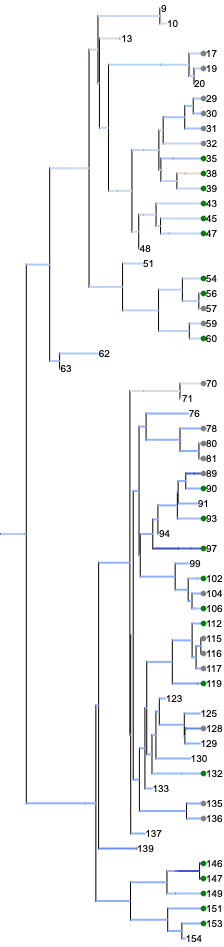

In [12]:
tree.draw_tree()

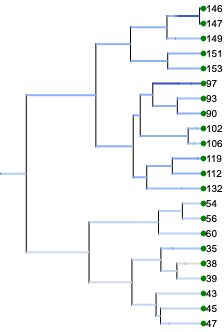

In [13]:
# select all nodes where it has descendant sampled node
event_cache = tree.tree.get_cached_content(store_attr="event")
tree.tree.prune([node for node, events in event_cache.items() if "sampled" in events], preserve_branch_length=True)

# select the sampled and mutation nodes -- prune method preserves additional nodes to maintain the structure
tree.tree.prune([node for node in tree.tree.traverse()
                 if node.event == "sampled" or node.event == "mutation"],
                preserve_branch_length=True)

# eliminate the birth node with one child
for node in tree.tree.traverse():
    if not node.is_leaf() and node.event == "birth" and len(node.children) == 1:
            node.delete(preserve_branch_length=True)

tree.draw_tree()

In [14]:
# tests
print(all(node.event == "sampled" for node in tree.tree.traverse() if node.is_leaf()))
print(all(len(node.children) == 2 for node in tree.tree.traverse() if node.event == "birth"))
pruned_sampled = set([node for node in tree.tree.traverse() if node.event == "sampled"])
print(original_sampled == pruned_sampled)

True
True
True
